# Mini-Project: COVID-19 7-Day Rolling Average

Using live data from the Johns Hopkins website and the pandas module, we will create a bar plot showing the daily number of new cases in Orange County using a 7-day rolling average.

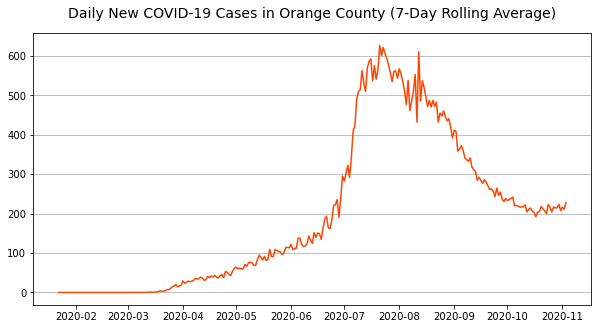

In [17]:
import numpy as np
import pandas as pd

## Loading from Online Resources

In [18]:
covid_url  = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
covid_file = "time_series_covid19_confirmed_US.csv"

covid = pd.read_csv(covid_url + covid_file, delimiter=",")

covid = covid.rename(columns={"Admin2":"County", "Province_State":"State"})
covid = covid[covid["State"] == "California"]
covid = covid.set_index("County")

unused_columns = ["UID", "iso2", "iso3", "code3", "FIPS", "Long_", "Lat", "Country_Region", "Combined_Key", "State"]
covid = covid.drop(columns=unused_columns)

covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0,0,0,0,0,0,0,0,0,0,...,23636,23775,23876,23994,24095,24162,24233,24370,24418,24664
Alpine,0,0,0,0,0,0,0,0,0,0,...,4,8,8,8,8,16,18,18,22,23
Amador,0,0,0,0,0,0,0,0,0,0,...,337,338,344,347,352,357,361,362,363,369
Butte,0,0,0,0,0,0,0,0,0,0,...,3134,3143,3160,3172,3185,3198,3211,3218,3239,3254
Calaveras,0,0,0,0,0,0,0,0,0,0,...,347,347,354,354,354,354,361,361,361,366


## Cumulative Stats to Daily-New Stats

In [19]:
# Create a copy of the original dataframe to work from
covidCopy = covid.copy()

last_col = covidCopy.shape[1]-1
for col in range(last_col, 0, -1):
    covidCopy.iloc[:,col] = covidCopy.iloc[:,col] - covidCopy.iloc[:,col-1]
covidCopy.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0,0,0,0,0,0,0,0,0,0,...,60,139,101,118,101,67,71,137,48,246
Alpine,0,0,0,0,0,0,0,0,0,0,...,1,4,0,0,0,8,2,0,4,1
Amador,0,0,0,0,0,0,0,0,0,0,...,2,1,6,3,5,5,4,1,1,6
Butte,0,0,0,0,0,0,0,0,0,0,...,27,9,17,12,13,13,13,7,21,15
Calaveras,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,7,0,0,5


## Computing the 7-Day Rolling Average

In [16]:
for pos in range(7):
    covidCopy.iloc[:,pos] = covidCopy.iloc[:,:pos].sum(axis=1)
    covidCopy.iloc[:,pos] = covidCopy.iloc[:,pos]/(pos+1)
    covidCopy.iloc[:,pos] = round(covidCopy.iloc[:,pos], 1)
covidCopy.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,60,139,101,118,101,67,71,137,48,246
Alpine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,1,4,0,0,0,8,2,0,4,1
Amador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,2,1,6,3,5,5,4,1,1,6
Butte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,27,9,17,12,13,13,13,7,21,15
Calaveras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,7,0,0,0,7,0,0,5


In [20]:
covidCopy.iloc[:,7].head()

County
Alameda      0
Alpine       0
Amador       0
Butte        0
Calaveras    0
Name: 1/29/20, dtype: int64

In [21]:
covidCopy.iloc[:,(7-6):7].head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20
County,,,,,,
Alameda,0,0,0,0,0,0
Alpine,0,0,0,0,0,0
Amador,0,0,0,0,0,0
Butte,0,0,0,0,0,0
Calaveras,0,0,0,0,0,0


In [22]:
covidCopy.iloc[:,(7-6):(7+1)].head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20
County,,,,,,,
Alameda,0,0,0,0,0,0,0
Alpine,0,0,0,0,0,0,0
Amador,0,0,0,0,0,0,0
Butte,0,0,0,0,0,0,0
Calaveras,0,0,0,0,0,0,0


In [ ]:
last_col = covid.shape[1]
for pos in range(7, last_col):
    covidCopy.iloc[:,pos] = covidCopy.iloc[:,(pos-6):(pos+1)].sum(axis=1)
    covidCopy.iloc[:,pos] = covidCopy.iloc[:,pos] / 7
    covidCopy.iloc[:,pos] = round(covidCopy.iloc[:,pos], 1)
covidCopy.head()

## Plotting

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
y_vals = covidCopy.loc["Orange"]

In [ ]:
x_vals = covidCopy.loc["Orange"].index
x_vals = [datetime.strptime(day, '%m/%d/%y') for day in x_vals]

In [ ]:
plt.figure(figsize=(10,5))
plt.gca().yaxis.grid()
plt.plot(x_vals, y_vals, "-", color="orangered")
plt.title("Daily New COVID-19 Cases in Orange County (7-Day Rolling Average)", fontsize=14, pad=15)
plt.show()

## Homework Exercise

This semester has been a hard one. I understand. No new homework tonight. Keep working on the project and/or catch up on a late assignment.